# Custom Object Detection with Web App in Python

## 1. Objective

__STEP 1__:
- Collect data (image) relevant for object detection

- Label the image manually

__STEP 2__:
- Train YOLO V5 Model for Object Detection

- We will use __Google Colab__ to train the model

__STEP 3__:
- Create the data pipeline for getting the predictions from YOLO V5 Model.

## 2. Step-1: Data Collection and Labeling

Data preparation is very important task which effect the performance of the model. Always double check while doing:
- Data collection

- Labeling

### Dos and Don'ts
- It's always recommended to use HD image
  - __Minimum__ width and height of the images should be at least 500 x 500
- Avoid blur images
- Avoid cluttery background images for objects
- The good labeling is when the box covers the object completely and efficiently.

### Collect Data or Images

We always need to select or collect the data accordingly to our required object. For the general purpose:

- Objective here is to detect __20 objects__
  - Person
  - Car
  - Chair
  - Bottle
  - Sofa
  - Bicycle
  - Horse
  - Boat
  - Motor Bike
  - Cat
  - TV Monitor
  - Cow
  - Sheep
  - Aero Plane
  - Train
  - Dining Table
  - Bus
  - Potted Plant
  - Bird
  - Dog
<br>
<br>
- Always collect more data for good performance in prediction (Deep Learning: more data, better performance)

- Generally, it is good to collect __more than 500+ images__ for single object detection.
  - For example, if you want to train your model for 2 objects, then you have to collect the data for at least 1000 images.

### Labeling

- Many tools are available to do __labeling__ to images for object detection

- List of tools:
  - Label Studio
  - Diffgram
  - LabelMe
  - LabelImg
  - VGG Image Annotator
  - LabelBox
  - Imglab
  - Semantic Segmentation Editor
  - BeaverDam
<br>
<br>
- i.e. LabelImg:

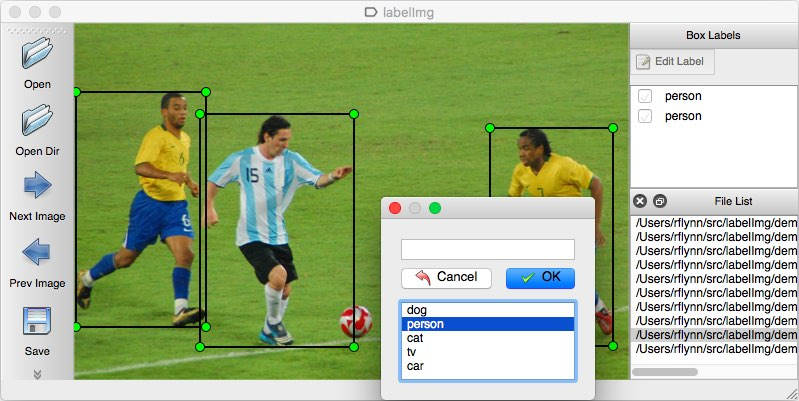